In [56]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
foot_data = pd.read_csv("Football.csv")
foot_data.head()
print(foot_data.columns)


Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC'],
      dtype='object')


In [58]:
foot_data = foot_data.drop(['Div', 'Date','Time'], axis=1)
print(foot_data.columns)

Index(['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HS',
       'AS', 'HST', 'AST', 'HC', 'AC'],
      dtype='object')


In [59]:
foot_data.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HC,AC
0,Fulham,Arsenal,0,3,A,0,1,5,13,2,6,2,3
1,Crystal Palace,Southampton,1,0,H,1,0,5,9,3,5,7,3
2,Liverpool,Leeds,4,3,H,3,2,22,6,6,3,9,0
3,West Ham,Newcastle,0,2,A,0,0,15,15,3,2,8,7
4,West Brom,Leicester,0,3,A,0,0,7,13,1,7,2,5


In [60]:
print(foot_data.dtypes)

HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
FTR         object
HTHG         int64
HTAG         int64
HS           int64
AS           int64
HST          int64
AST          int64
HC           int64
AC           int64
dtype: object


In [61]:
# One-Hot Encoding for categorical variables
foot_data = pd.get_dummies(foot_data, columns=['HomeTeam', 'AwayTeam'], drop_first=False)


In [62]:
foot_data.head()

,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HC,...,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Sheffield United,AwayTeam_Southampton,AwayTeam_Tottenham,AwayTeam_West Brom,AwayTeam_West Ham,AwayTeam_Wolves
0,0,3,A,0,1,5,13,2,6,2,...,False,False,False,False,False,False,False,False,False,False
1,1,0,H,1,0,5,9,3,5,7,...,False,False,False,False,False,True,False,False,False,False
2,4,3,H,3,2,22,6,6,3,9,...,False,False,False,False,False,False,False,False,False,False
3,0,2,A,0,0,15,15,3,2,8,...,False,False,False,True,False,False,False,False,False,False
4,0,3,A,0,0,7,13,1,7,2,...,False,False,False,False,False,False,False,False,False,False


In [63]:
foot_data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,1.369565,1.353261,0.711957,0.581522,12.586957,11.244565,4.505435,4.059783,5.586957,4.625000
std,1.340560,1.338864,0.861228,0.832329,5.325785,4.961047,2.558597,2.372822,3.121062,2.585294
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,3.000000,3.000000
50%,1.000000,1.000000,1.000000,0.000000,12.000000,11.000000,4.000000,3.500000,5.000000,4.000000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.250000,7.000000,6.000000
max,7.000000,7.000000,4.000000,4.000000,28.000000,28.000000,14.000000,14.000000,16.000000,13.000000


In [64]:
# Check for missing values
print(foot_data.isnull().sum())

# Drop rows with missing values
foot_data.dropna(inplace=True)


FTHG                         0
FTAG                         0
FTR                          0
HTHG                         0
HTAG                         0
HS                           0
AS                           0
HST                          0
AST                          0
HC                           0
AC                           0
HomeTeam_Arsenal             0
HomeTeam_Aston Villa         0
HomeTeam_Brighton            0
HomeTeam_Burnley             0
HomeTeam_Chelsea             0
HomeTeam_Crystal Palace      0
HomeTeam_Everton             0
HomeTeam_Fulham              0
HomeTeam_Leeds               0
HomeTeam_Leicester           0
HomeTeam_Liverpool           0
HomeTeam_Man City            0
HomeTeam_Man United          0
HomeTeam_Newcastle           0
HomeTeam_Sheffield United    0
HomeTeam_Southampton         0
HomeTeam_Tottenham           0
HomeTeam_West Brom           0
HomeTeam_West Ham            0
HomeTeam_Wolves              0
AwayTeam_Arsenal             0
AwayTeam

In [65]:
# Check for duplicates
print(foot_data.duplicated().sum())

# Remove duplicates
foot_data.drop_duplicates(inplace=True)


0


In [66]:
# Check the cleaned DataFrame
print(foot_data.head())
print(foot_data.info())


   FTHG  FTAG FTR  HTHG  HTAG  HS  AS  HST  AST  HC  ...  AwayTeam_Liverpool  \
0     0     3   A     0     1   5  13    2    6   2  ...               False   
1     1     0   H     1     0   5   9    3    5   7  ...               False   
2     4     3   H     3     2  22   6    6    3   9  ...               False   
3     0     2   A     0     0  15  15    3    2   8  ...               False   
4     0     3   A     0     0   7  13    1    7   2  ...               False   

   AwayTeam_Man City  AwayTeam_Man United  AwayTeam_Newcastle  \
0              False                False               False   
1              False                False               False   
2              False                False               False   
3              False                False                True   
4              False                False               False   

   AwayTeam_Sheffield United  AwayTeam_Southampton  AwayTeam_Tottenham  \
0                      False                 False    

C:\Users\ITWORK\AppData\Local\Temp\ipykernel_1352\423478612.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=away_goals.values, y=away_goals.index, ax=axes[0], palette= "Blues_d")
C:\Users\ITWORK\AppData\Local\Temp\ipykernel_1352\423478612.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_goals.values, y=home_goals.index, ax=axes[1], palette="Greens_d")


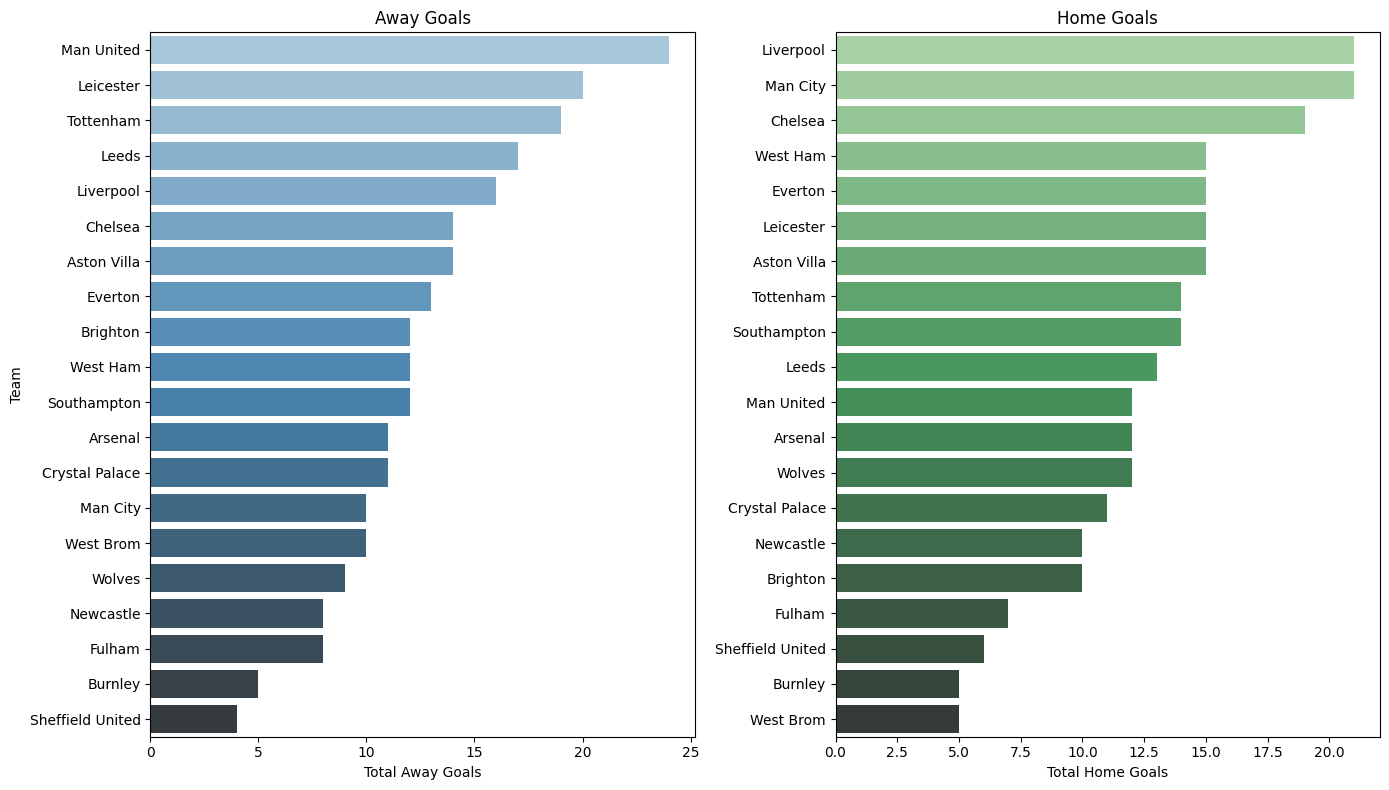

In [67]:
# Step 1: Calculate total away goals for each team
away_goal_columns =foot_data.filter(like='AwayTeam_').columns
foot_data['AwayTeam'] =foot_data[away_goal_columns].idxmax(axis=1)
foot_data['AwayTeam'] =foot_data['AwayTeam'].str.replace('AwayTeam_', '')
away_goals =foot_data.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False)

# Step 2: Calculate total home goals for each team
home_goal_columns =foot_data.filter(like='HomeTeam_').columns
foot_data['HomeTeam'] =foot_data[home_goal_columns].idxmax(axis=1)
foot_data['HomeTeam'] =foot_data['HomeTeam'].str.replace('HomeTeam_', '')
home_goals =foot_data.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False)

# Step 3: Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Plot 1: Teams by Away Goals
sns.barplot(x=away_goals.values, y=away_goals.index, ax=axes[0], palette= "Blues_d")
axes[0].set_title('Away Goals')
axes[0].set_xlabel('Total Away Goals')
axes[0].set_ylabel('Team')

# Plot 2: Teams by Home Goals
sns.barplot(x=home_goals.values, y=home_goals.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Home Goals')
axes[1].set_xlabel('Total Home Goals')
axes[1].set_ylabel('')

# Show the plots
plt.tight_layout()
plt.show()


C:\Users\ITWORK\AppData\Local\Temp\ipykernel_1352\3909696523.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=away_shots.values, y=away_shots.index, ax=axes[0], palette= "Blues_d")
C:\Users\ITWORK\AppData\Local\Temp\ipykernel_1352\3909696523.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_shots.values, y=home_shots.index, ax=axes[1], palette="Greens_d")


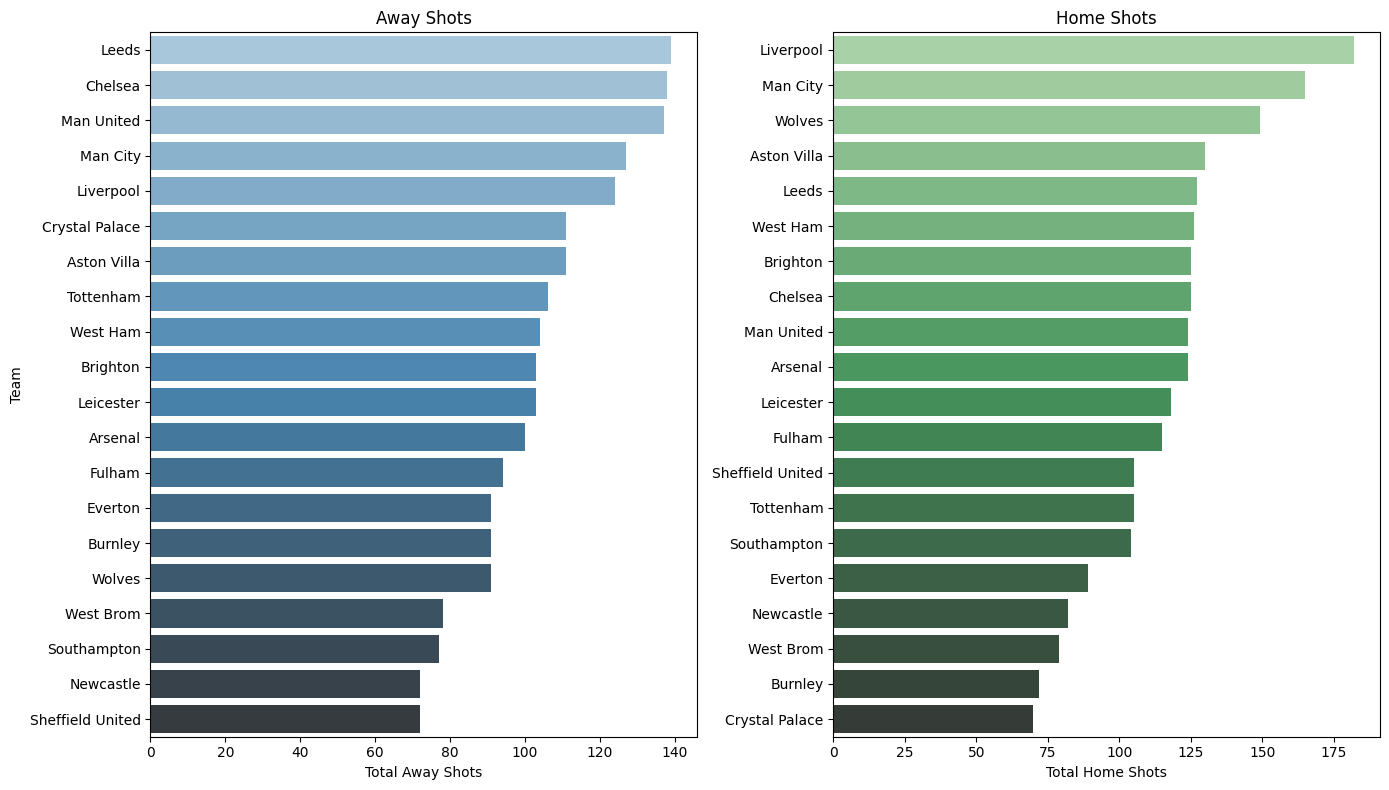

In [68]:

away_shots =foot_data.groupby('AwayTeam')['AS'].sum().sort_values(ascending=False)

home_shots =foot_data.groupby('HomeTeam')['HS'].sum().sort_values(ascending=False)

# Step 3: Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Plot 1: Teams by Away Goals
sns.barplot(x=away_shots.values, y=away_shots.index, ax=axes[0], palette= "Blues_d")
axes[0].set_title('Away Shots')
axes[0].set_xlabel('Total Away Shots')
axes[0].set_ylabel('Team')

# Plot 2: Teams by Home Goals
sns.barplot(x=home_shots.values, y=home_shots.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Home Shots')
axes[1].set_xlabel('Total Home Shots')
axes[1].set_ylabel('')

# Show the plots
plt.tight_layout()
plt.show()

C:\Users\ITWORK\AppData\Local\Temp\ipykernel_1352\3080451149.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=away_shots_ontarget.values, y=away_shots_ontarget.index, ax=axes[0], palette= "Blues_d")
C:\Users\ITWORK\AppData\Local\Temp\ipykernel_1352\3080451149.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_shots_ontarget.values, y=home_shots_ontarget.index, ax=axes[1], palette="Greens_d")


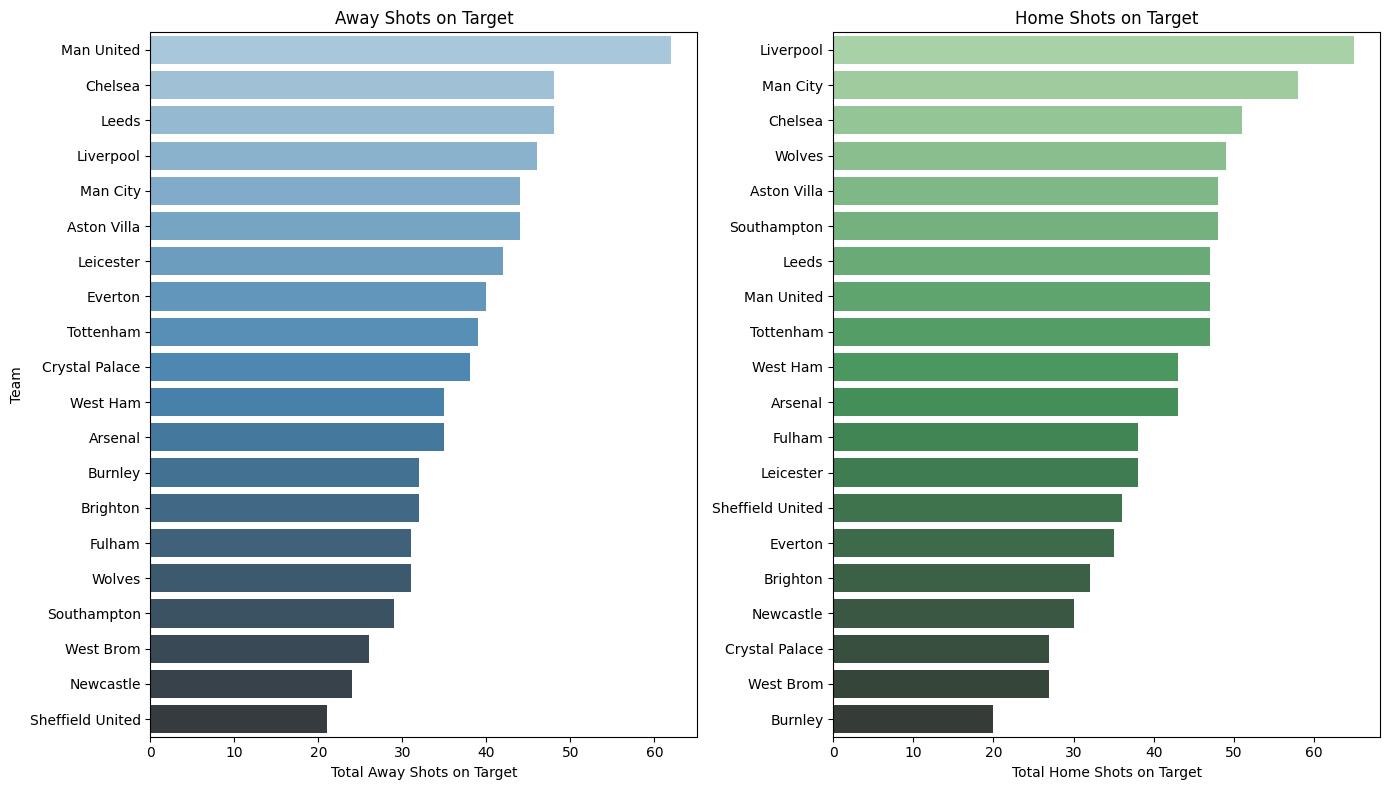

In [69]:
away_shots_ontarget =foot_data.groupby('AwayTeam')['AST'].sum().sort_values(ascending=False)

home_shots_ontarget =foot_data.groupby('HomeTeam')['HST'].sum().sort_values(ascending=False)

# Step 3: Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Plot 1: Teams by Away Goals
sns.barplot(x=away_shots_ontarget.values, y=away_shots_ontarget.index, ax=axes[0], palette= "Blues_d")
axes[0].set_title('Away Shots on Target')
axes[0].set_xlabel('Total Away Shots on Target')
axes[0].set_ylabel('Team')

# Plot 2: Teams by Home Goals
sns.barplot(x=home_shots_ontarget.values, y=home_shots_ontarget.index, ax=axes[1], palette="Greens_d")
axes[1].set_title('Home Shots on Target')
axes[1].set_xlabel('Total Home Shots on Target')
axes[1].set_ylabel('')

# Show the plots
plt.tight_layout()
plt.show()

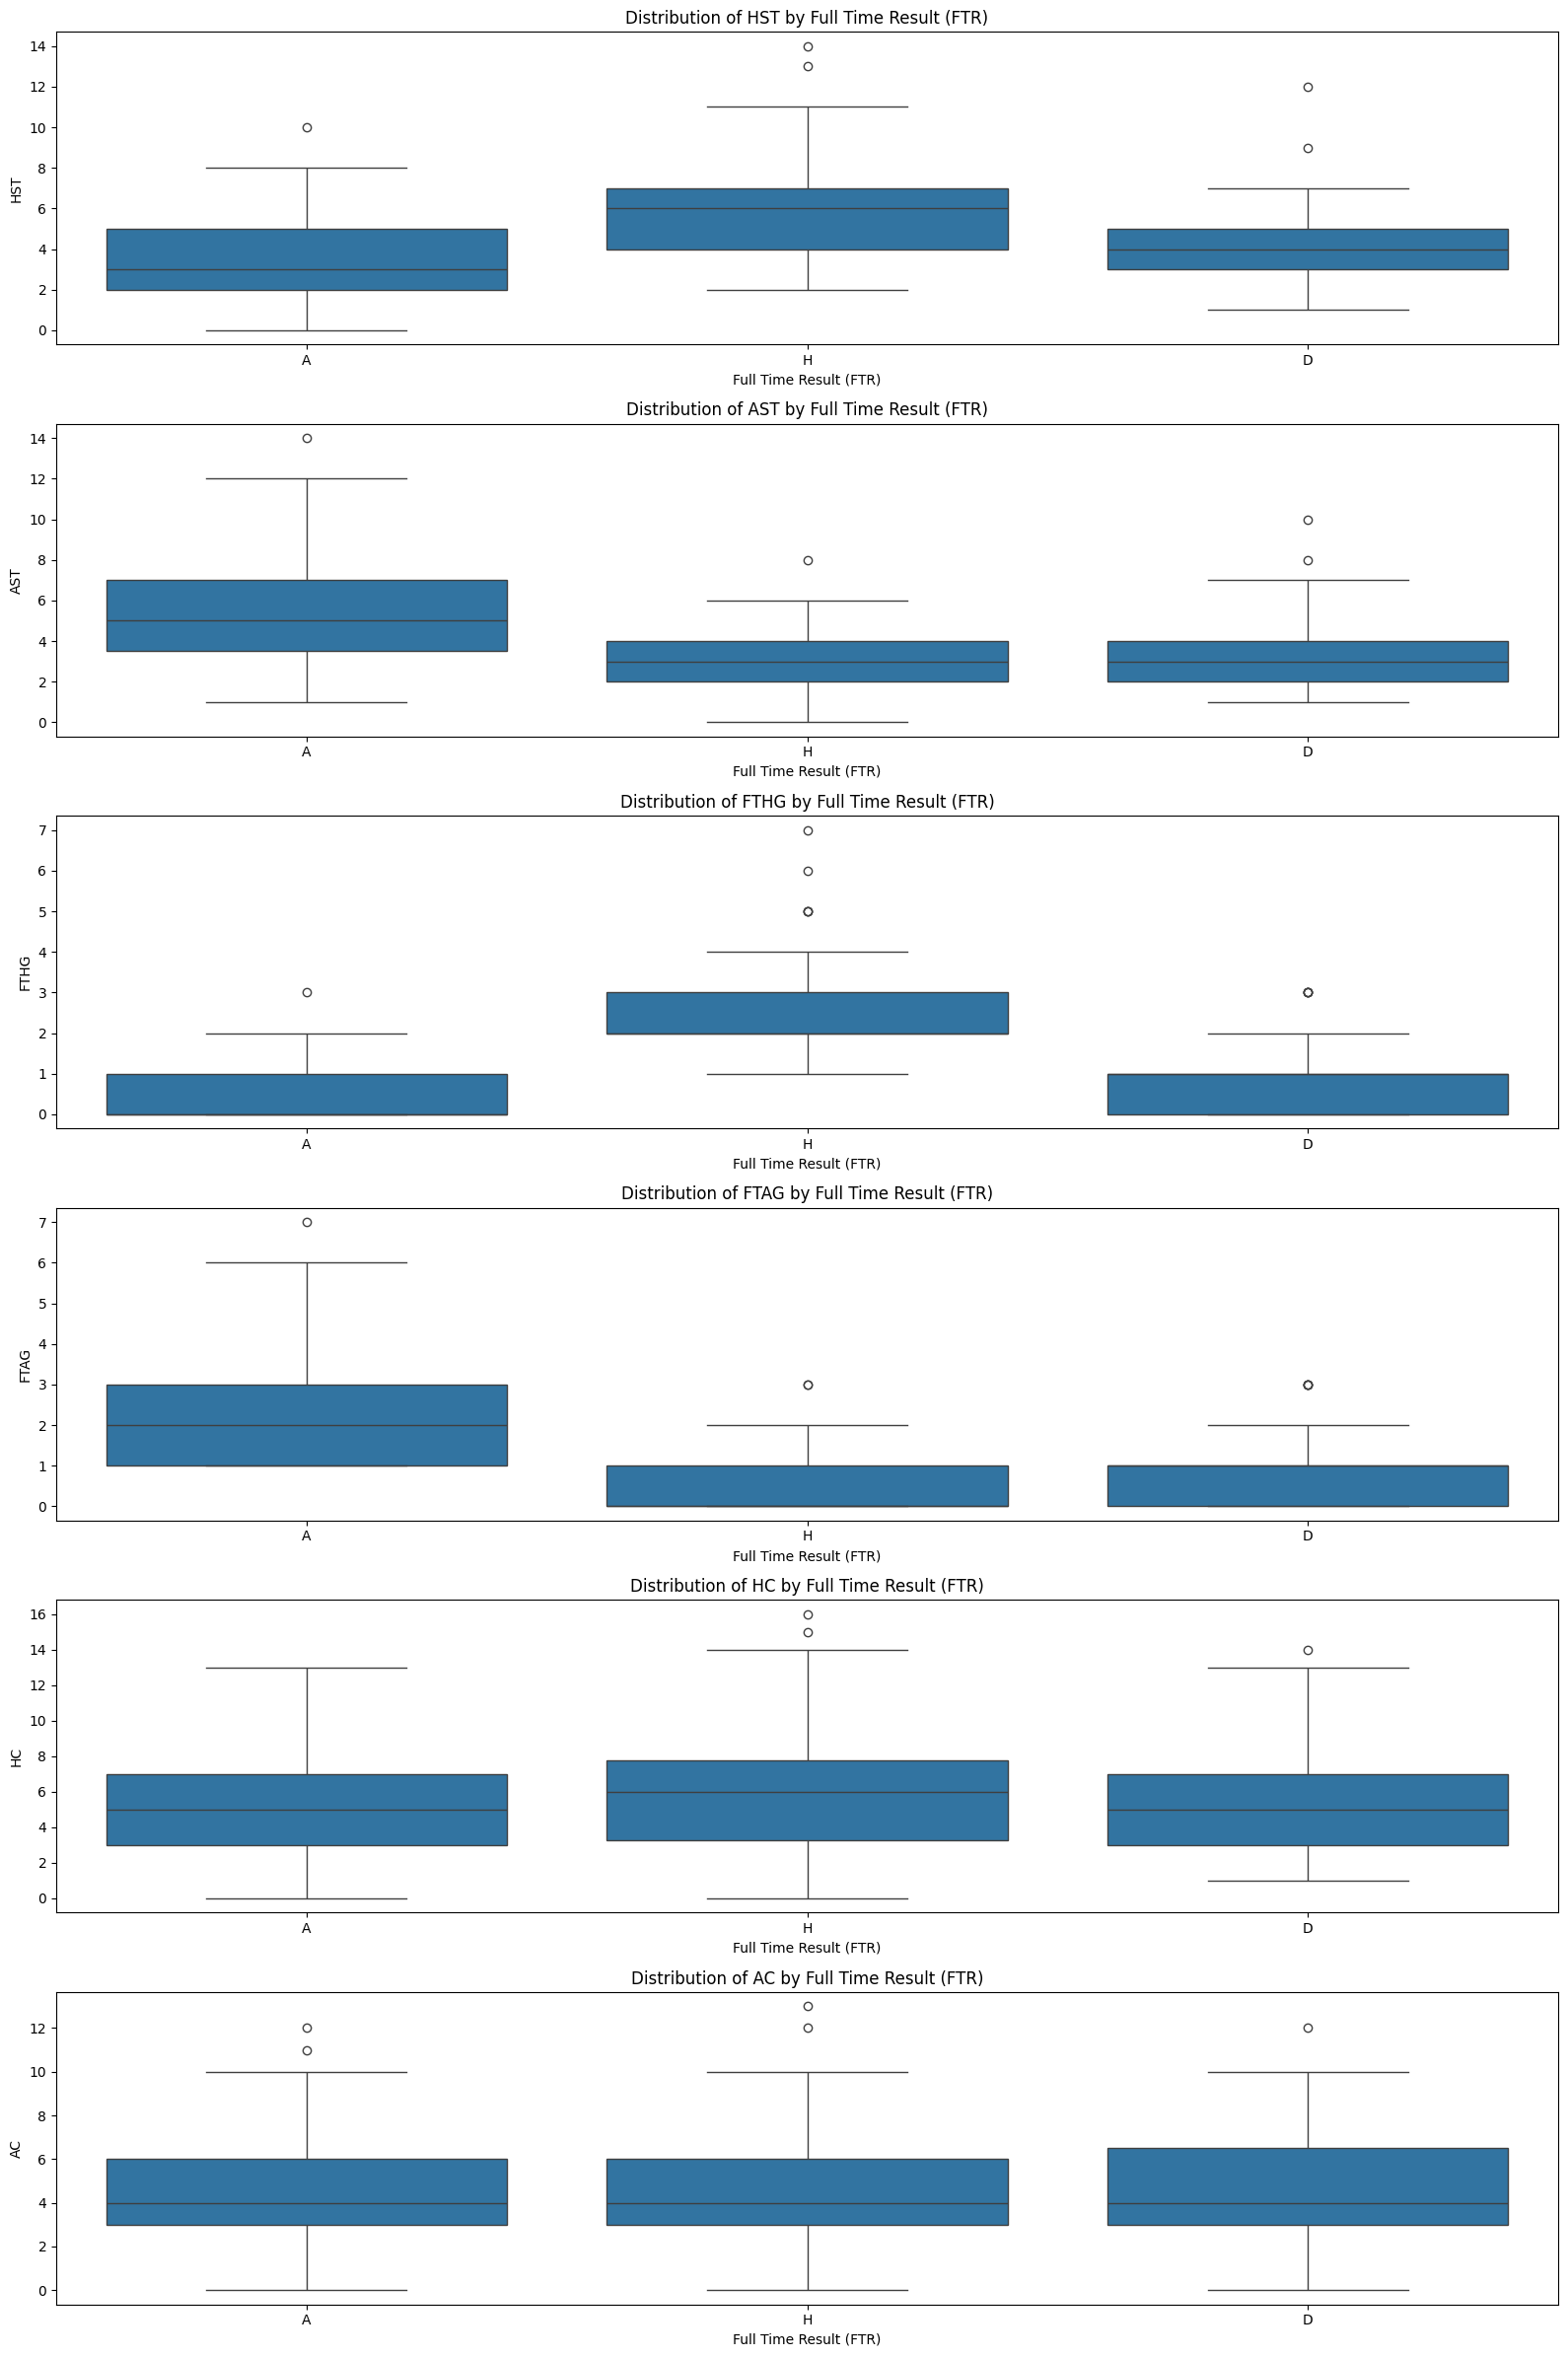

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_vs_ftr(foot_data, features):
    """
    Plots the distribution of specified features against the FTR (Full Time Result).
    
    Parameters:
    - foot_data: pandas DataFrame containing the data.
    - features: List of features to plot against FTR.
    """
    num_features = len(features)
    plt.figure(figsize=(16, 4 * num_features))

    for i, feature in enumerate(features, 1):
        plt.subplot(num_features, 1, i)
        sns.boxplot(x='FTR', y=feature, data=foot_data)
        plt.title(f'Distribution of {feature} by Full Time Result (FTR)')
        plt.xlabel('Full Time Result (FTR)')
        plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

# List of features to plot
features_to_plot = ['HST', 'AST', 'FTHG', 'FTAG', 'HC', 'AC']

# Plotting
plot_feature_vs_ftr(foot_data, features_to_plot)


In [71]:
from sklearn.model_selection import train_test_split

# Assuming foot_data is your DataFrame and 'FTR' is your target variable
X = foot_data.drop(columns=['FTR'])  # Features
y = foot_data['FTR']  # Target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [72]:
# Drop the original AwayTeam and HomeTeam columns
X = X.drop(columns=['AwayTeam', 'HomeTeam'])
print(X.dtypes)


FTHG                         int64
FTAG                         int64
HTHG                         int64
HTAG                         int64
HS                           int64
AS                           int64
HST                          int64
AST                          int64
HC                           int64
AC                           int64
HomeTeam_Arsenal              bool
HomeTeam_Aston Villa          bool
HomeTeam_Brighton             bool
HomeTeam_Burnley              bool
HomeTeam_Chelsea              bool
HomeTeam_Crystal Palace       bool
HomeTeam_Everton              bool
HomeTeam_Fulham               bool
HomeTeam_Leeds                bool
HomeTeam_Leicester            bool
HomeTeam_Liverpool            bool
HomeTeam_Man City             bool
HomeTeam_Man United           bool
HomeTeam_Newcastle            bool
HomeTeam_Sheffield United     bool
HomeTeam_Southampton          bool
HomeTeam_Tottenham            bool
HomeTeam_West Brom            bool
HomeTeam_West Ham   

In [73]:
# Check for any non-numeric data types
non_numeric_columns = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index([], dtype='object')


In [74]:
for col in non_numeric_columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X = X.drop(columns=non_numeric_columns)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8378378378378378
Classification Report:
               precision    recall  f1-score   support

           A       0.77      1.00      0.87        10
           D       0.88      0.58      0.70        12
           H       0.88      0.93      0.90        15

    accuracy                           0.84        37
   macro avg       0.84      0.84      0.82        37
weighted avg       0.85      0.84      0.83        37

Confusion Matrix:
 [[10  0  0]
 [ 3  7  2]
 [ 0  1 14]]


In [76]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6756756756756757
Classification Report:
               precision    recall  f1-score   support

           A       0.53      0.90      0.67        10
           D       0.62      0.42      0.50        12
           H       0.92      0.73      0.81        15

    accuracy                           0.68        37
   macro avg       0.69      0.68      0.66        37
weighted avg       0.72      0.68      0.67        37

Confusion Matrix:
 [[ 9  0  1]
 [ 7  5  0]
 [ 1  3 11]]


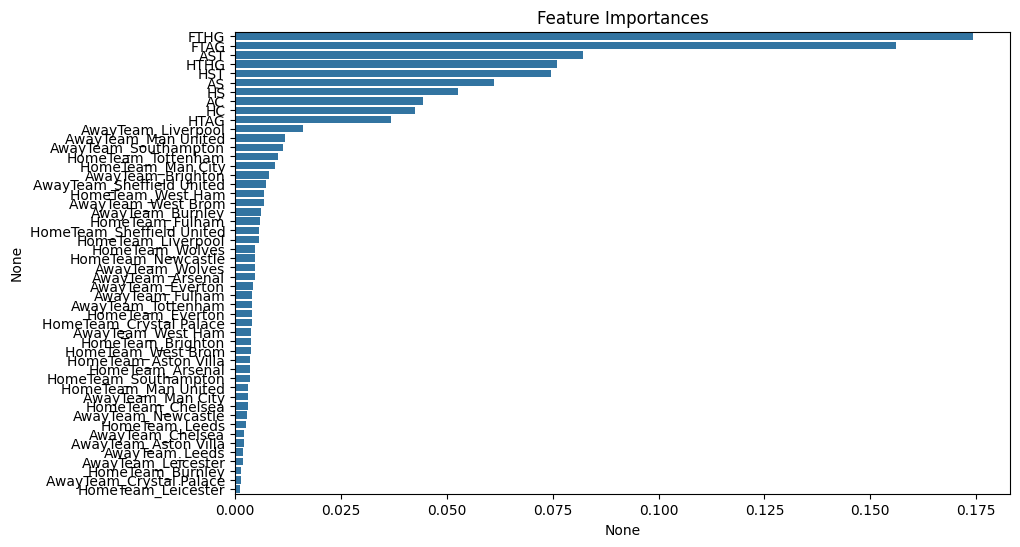

In [77]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()